In [2]:
import urllib.request
url = 'https://bank.gov.ua/NBU_Exchange/exchange_site?start=20210101&end=20220101&valcode=usd&sort=exchangedate&json'
url2 = 'https://bank.gov.ua/NBU_Exchange/exchange_site?start=20210101&end=20220101&valcode=eur&sort=exchangedate&json'
urllib.request.urlretrieve(url, 'usd.json') 
urllib.request.urlretrieve(url2, 'eur.json') 

('eur.json', <http.client.HTTPMessage at 0x7fb0faa59bd0>)

In [3]:
import json
import pandas as pd
def csvfile(val):
    f=open(val+".json", "r")
    json_data = f.read()
    data = json.loads(json_data)
    df = pd.DataFrame(data)
    df.to_csv(val+".csv", index=False)
    get_ipython().system(' ls')
csvfile("usd")
csvfile("eur")

CurrencyCodeL.jpg  eur.json    test.txt  Untitled1.ipynb  usd.csv      usd.json
Currency.jpg	   result.csv  uah.json  Untitled.ipynb   USD_EUR.jpg
CurrencyCodeL.jpg  eur.json    uah.json		usd.csv
Currency.jpg	   result.csv  Untitled1.ipynb	USD_EUR.jpg
eur.csv		   test.txt    Untitled.ipynb	usd.json


In [4]:
! cat usd.csv

exchangedate,r030,cc,txt,enname,rate,units,rate_per_unit,group,calcdate
01.01.2021,840,USD,Долар США,US Dollar,28.2746,1,28.2746,1,30.12.2020
02.01.2021,840,USD,Долар США,US Dollar,28.2746,1,28.2746,1,30.12.2020
03.01.2021,840,USD,Долар США,US Dollar,28.2746,1,28.2746,1,30.12.2020
04.01.2021,840,USD,Долар США,US Dollar,28.2746,1,28.2746,1,30.12.2020
05.01.2021,840,USD,Долар США,US Dollar,28.431,1,28.431,1,04.01.2021
06.01.2021,840,USD,Долар США,US Dollar,28.4028,1,28.4028,1,05.01.2021
07.01.2021,840,USD,Долар США,US Dollar,28.4028,1,28.4028,1,05.01.2021
08.01.2021,840,USD,Долар США,US Dollar,28.4028,1,28.4028,1,05.01.2021
09.01.2021,840,USD,Долар США,US Dollar,28.4028,1,28.4028,1,05.01.2021
10.01.2021,840,USD,Долар США,US Dollar,28.4028,1,28.4028,1,05.01.2021
11.01.2021,840,USD,Долар США,US Dollar,28.2847,1,28.2847,1,06.01.2021
12.01.2021,840,USD,Долар США,US Dollar,28.2038,1,28.2038,1,11.01.2021
13.01.2021,840,USD,Долар США,US Dollar,28.046,1,28.046,1,12.01.2021
14.01.2021,840,USD,Дол

In [5]:
! cat eur.csv

exchangedate,r030,cc,txt,enname,rate,units,rate_per_unit,group,calcdate
01.01.2021,978,EUR,Євро,Euro,34.7396,1,34.7396,1,30.12.2020
02.01.2021,978,EUR,Євро,Euro,34.7396,1,34.7396,1,30.12.2020
03.01.2021,978,EUR,Євро,Euro,34.7396,1,34.7396,1,30.12.2020
04.01.2021,978,EUR,Євро,Euro,34.7396,1,34.7396,1,30.12.2020
05.01.2021,978,EUR,Євро,Euro,34.9389,1,34.9389,1,04.01.2021
06.01.2021,978,EUR,Євро,Euro,34.846,1,34.846,1,05.01.2021
07.01.2021,978,EUR,Євро,Euro,34.846,1,34.846,1,05.01.2021
08.01.2021,978,EUR,Євро,Euro,34.846,1,34.846,1,05.01.2021
09.01.2021,978,EUR,Євро,Euro,34.846,1,34.846,1,05.01.2021
10.01.2021,978,EUR,Євро,Euro,34.846,1,34.846,1,05.01.2021
11.01.2021,978,EUR,Євро,Euro,34.909,1,34.909,1,06.01.2021
12.01.2021,978,EUR,Євро,Euro,34.2817,1,34.2817,1,11.01.2021
13.01.2021,978,EUR,Євро,Euro,34.0787,1,34.0787,1,12.01.2021
14.01.2021,978,EUR,Євро,Euro,34.0373,1,34.0373,1,13.01.2021
15.01.2021,978,EUR,Євро,Euro,33.9888,1,33.9888,1,14.01.2021
16.01.2021,978,EUR,Євро,Euro,34.0121,1,3

In [6]:
! aws s3 cp usd.csv s3://mybucket-lab2/CSV/data2usd.csv
! aws s3 ls s3://mybucket-lab2/CSV/

upload: ./usd.csv to s3://mybucket-lab2/CSV/data2usd.csv          
2022-06-23 22:07:15       9058 Currency.jpg
2022-06-23 21:30:32       2306 data.csv
2022-06-25 19:41:38      28510 data2usd.csv


In [7]:
! aws s3 cp eur.csv s3://mybucket-lab2/CSV/data2eur.csv
! aws s3 ls s3://mybucket-lab2/CSV/

upload: ./eur.csv to s3://mybucket-lab2/CSV/data2eur.csv          
2022-06-23 22:07:15       9058 Currency.jpg
2022-06-23 21:30:32       2306 data.csv
2022-06-25 19:42:04      23396 data2eur.csv
2022-06-25 19:41:38      28510 data2usd.csv


In [39]:
import boto3
import pandas as pd
import io

s3 = boto3.resource('s3')
bucket = s3.Bucket('mybucket-lab2')

file1 = s3.ObjectSummary(bucket_name = 'mybucket-lab2', key = 'CSV/data2usd.csv')
file_content1 = file1.get()['Body'].read()
data_frame1 = pd.read_csv(io.BytesIO(file_content1), header=0, delimiter=",", low_memory=False)

file2 = s3.ObjectSummary(bucket_name = 'mybucket-lab2', key = 'CSV/data2eur.csv')
file_content2 = file2.get()['Body'].read()
data_frame2 = pd.read_csv(io.BytesIO(file_content2), header=0, delimiter=",", low_memory=False)

print(data_frame1)
print(data_frame2)

    exchangedate  r030   cc        txt     enname     rate  units  \
0     01.01.2021   840  USD  Долар США  US Dollar  28.2746      1   
1     02.01.2021   840  USD  Долар США  US Dollar  28.2746      1   
2     03.01.2021   840  USD  Долар США  US Dollar  28.2746      1   
3     04.01.2021   840  USD  Долар США  US Dollar  28.2746      1   
4     05.01.2021   840  USD  Долар США  US Dollar  28.4310      1   
..           ...   ...  ...        ...        ...      ...    ...   
361   28.12.2021   840  USD  Долар США  US Dollar  27.2306      1   
362   29.12.2021   840  USD  Долар США  US Dollar  27.2235      1   
363   30.12.2021   840  USD  Долар США  US Dollar  27.2077      1   
364   31.12.2021   840  USD  Долар США  US Dollar  27.2782      1   
365   01.01.2022   840  USD  Долар США  US Dollar  27.2782      1   

     rate_per_unit  group    calcdate  
0          28.2746      1  30.12.2020  
1          28.2746      1  30.12.2020  
2          28.2746      1  30.12.2020  
3          

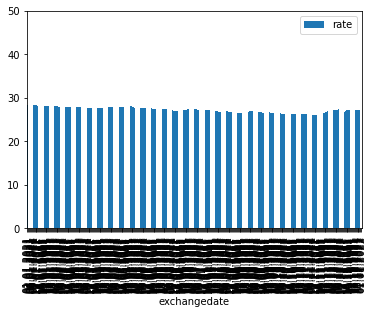

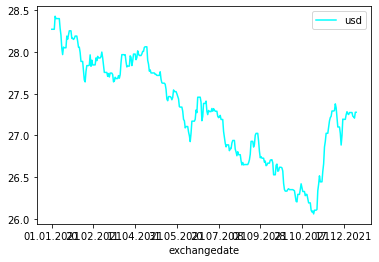

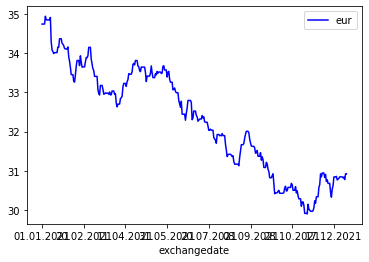

In [51]:
import matplotlib.pyplot as plt

df = pd.DataFrame(data_frame1, columns = ['exchangedate','rate'])
df2 = pd.DataFrame(data_frame2, columns = ['exchangedate','rate'])

df.plot(x='exchangedate', y='rate', color="cyan",label="usd")
df2.plot(x='exchangedate', y='rate', color="blue",label="eur")

plt.show()

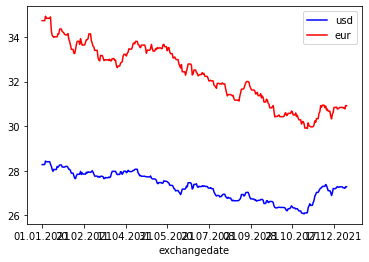

In [74]:
import matplotlib.pyplot as plt

ax = plt.gca() 
data1 = pd.DataFrame(data_frame1, columns = ['exchangedate','rate'])
data2 = pd.DataFrame(data_frame2, columns = ['exchangedate','rate'])
data1.plot(x='exchangedate', y='rate', color="blue",label="usd",ax=ax)
data2.plot(x='exchangedate', y='rate', color="red",label="eur",ax=ax)

plt.savefig("Money.jpg")
plt.show()

In [75]:
! aws s3 cp Money.jpg s3://mybucket-lab2/CSV/Money.jpg

upload: ./Money.jpg to s3://mybucket-lab2/CSV/Money.jpg           
